Mini Project - Build a machine learning model that predicts the type of people who survived
the Titanic shipwreck using passenger data (i.e. name, age, gender, socio-economic class, etc.).
Dataset Link: https://www.kaggle.com/competitions/titanic/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
print('Number of passengers in train dataset: ' + str(len(train)))

Number of passengers in train dataset: 891


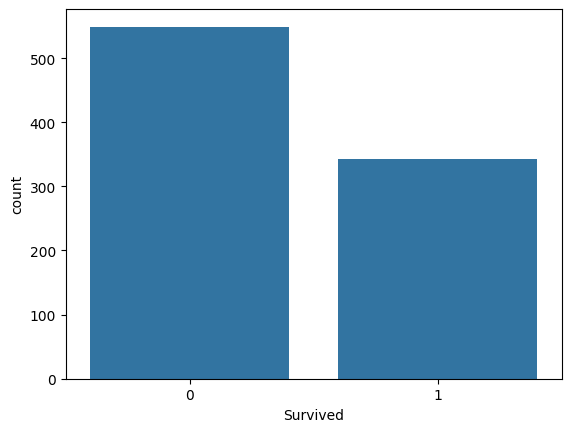

In [6]:
sns.countplot(x='Survived', data=train)
plt.show()


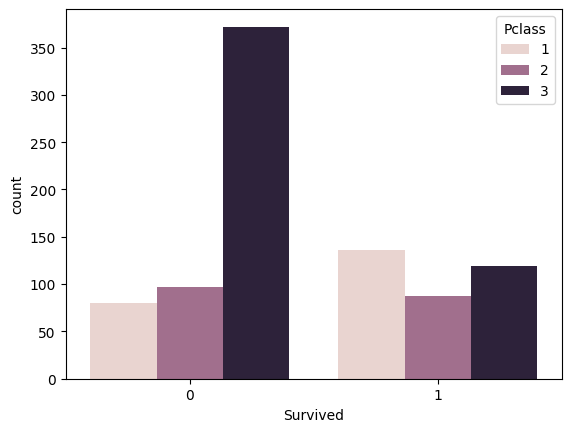

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.show()

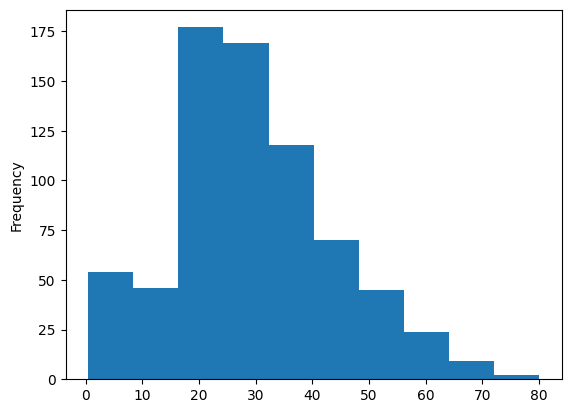

In [8]:
train['Age'].plot.hist()
plt.show()

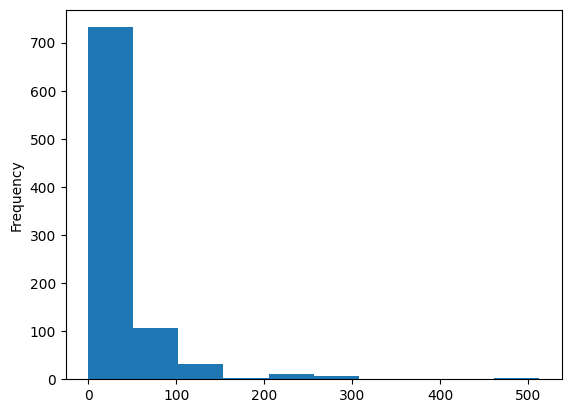

In [9]:

train['Fare'].plot.hist()
plt.show()


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


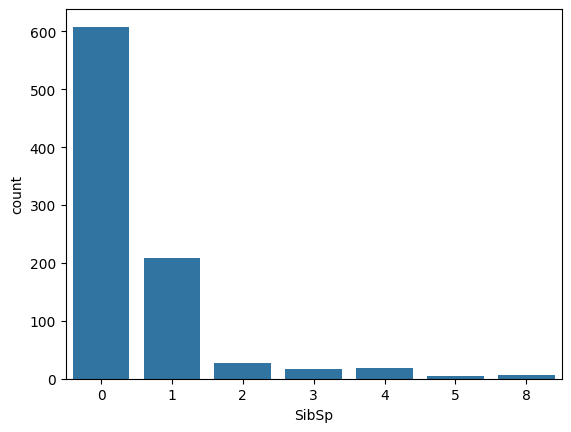

In [11]:

sns.countplot(x='SibSp', data=train)
plt.show()

In [12]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


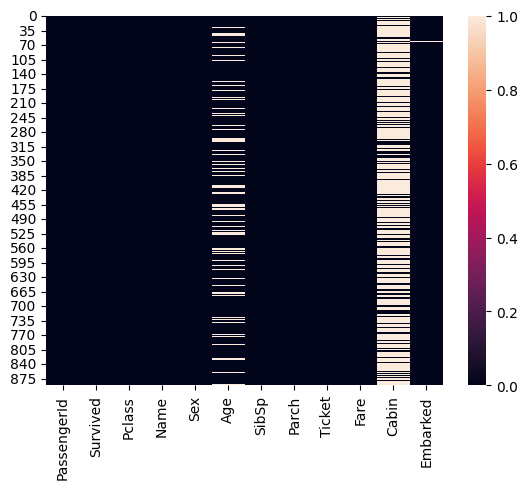

In [13]:

sns.heatmap(train.isnull())
plt.show()


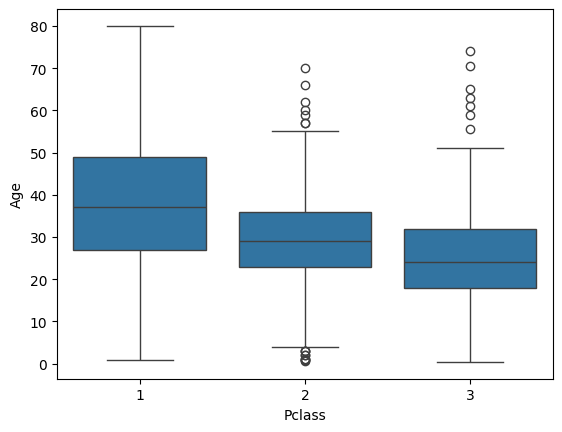

In [14]:

sns.boxplot(x='Pclass', y='Age', data=train)
plt.show()


In [15]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
pcl = pd.get_dummies(train['Pclass'], drop_first=True)

In [16]:
train = pd.concat([train, sex, embark, pcl], axis=1)


In [17]:
train.drop(['Pclass', 'Sex', 'Embarked', 'Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [18]:
print(train.isnull().sum())

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
male          0
Q             0
S             0
2             0
3             0
dtype: int64


In [19]:
train_values = {'Age': round(np.mean(train['Age']))}
train = train.fillna(value=train_values)


In [20]:
sex = pd.get_dummies(test['Sex'], drop_first=True)
embark = pd.get_dummies(test['Embarked'], drop_first=True)
pcl = pd.get_dummies(test['Pclass'], drop_first=True)

In [21]:
test = pd.concat([test, sex, embark, pcl], axis=1)

In [22]:
test.drop(['Pclass', 'Sex', 'Embarked', 'Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)



In [23]:
print(test.isnull().sum())

Age      86
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
2         0
3         0
dtype: int64


In [24]:
test_values = {'Age': round(np.mean(test['Age'])), 'Fare': round(np.mean(test['Fare']))}
test = test.fillna(value=test_values)

In [25]:
train.columns = train.columns.astype(str)
test.columns = test.columns.astype(str)

In [26]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [27]:
X.columns = X.columns.astype(str)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [29]:
logmodel = LogisticRegression(solver='liblinear')

In [30]:
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [31]:

predictions = logmodel.predict(X_test)

In [32]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('Accuracy:', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.81      0.65      0.72       115

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268

[[135  18]
 [ 40  75]]
Accuracy: 0.7835820895522388


In [33]:
test_predictions = logmodel.predict(test)

In [34]:
output = pd.DataFrame({'PassengerId': range(892, 892 + len(test_predictions)), 'Survived': test_predictions})
print(output.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [36]:
models={
    "Logistics Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Ada Boost ":AdaBoostClassifier()
}

for i in range (len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred  = model.predict(X_test)

  # Training set performance
  model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
  model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
  model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
  model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
  model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

# Testing set performance
  model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
  model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
  model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
  model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
  model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

  print(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Accuracy: {:.4f}".format(model_train_accuracy))
  print('- F1 score: {:.4f}'.format(model_train_f1))

  print('- Precision: {:.4f}'.format(model_train_precision))
  print('- Recall: {:.4f}'.format(model_train_recall))
  print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



  print('----------------------------------')

  print('Model performance for Test set')
  print('- Accuracy: {:.4f}'.format(model_test_accuracy))
  print('- F1 score: {:.4f}'.format(model_test_f1))
  print('- Precision: {:.4f}'.format(model_test_precision))
  print('- Recall: {:.4f}'.format(model_test_recall))
  print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


  print('='*35)
  print('\n')


Logistics Regression
Model performance for Training set
- Accuracy: 0.8154
- F1 score: 0.8133
- Precision: 0.7718
- Recall: 0.7004
- Roc Auc Score: 0.7909
----------------------------------
Model performance for Test set
- Accuracy: 0.7761
- F1 score: 0.7728
- Precision: 0.7835
- Recall: 0.6609
- Roc Auc Score: 0.7618


Decision Tree
Model performance for Training set
- Accuracy: 0.9888
- F1 score: 0.9887
- Precision: 0.9955
- Recall: 0.9736
- Roc Auc Score: 0.9855
----------------------------------
Model performance for Test set
- Accuracy: 0.7425
- F1 score: 0.7385
- Precision: 0.7396
- Recall: 0.6174
- Roc Auc Score: 0.7270


Random Forest
Model performance for Training set
- Accuracy: 0.9888
- F1 score: 0.9887
- Precision: 0.9955
- Recall: 0.9736
- Roc Auc Score: 0.9855
----------------------------------
Model performance for Test set
- Accuracy: 0.7799
- F1 score: 0.7747
- Precision: 0.8111
- Recall: 0.6348
- Roc Auc Score: 0.7618


Gradient Boost
Model performance for Training se

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [37]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
DT = DecisionTreeClassifier(
    criterion='gini',         
    max_depth=None,          
    min_samples_split=2,      
    min_samples_leaf=1,       
    max_features=None,        
    random_state=42  
)         

In [39]:
DT.fit(X_train1, y_train1)

DecisionTreeClassifier(random_state=42)

In [40]:
predictions_dt = DT.predict(X_test1)

In [43]:
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(cm)
print('Accuracy:', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.81      0.65      0.72       115

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268

[[135  18]
 [ 40  75]]
Accuracy: 0.7835820895522388


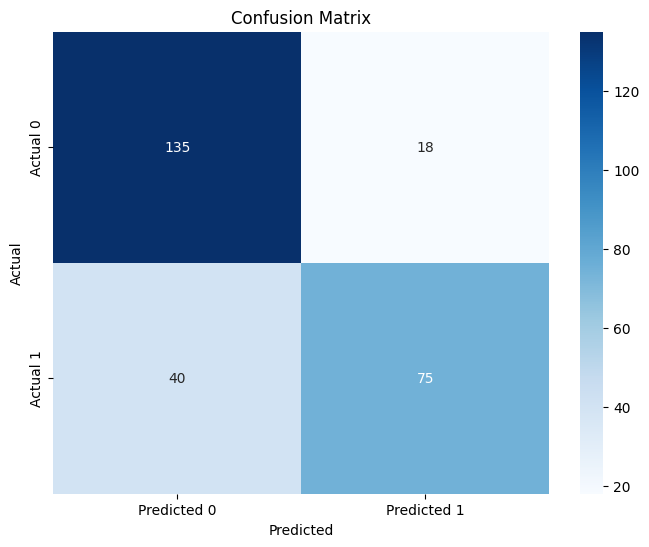

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()